# Combining and Merging Datasets

 pandas.merge connects rows in DataFrames based on one or more keys. 
 <br> This will be familiar to users of SQL or other relational databases, as it implements database join operations.

## Database-Style DataFrame Joins

In [2]:
import pandas as pd

In [3]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                        'data1': range(7)})

In [5]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                   'data2': range(3)})

In [6]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [7]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [9]:
pd.merge(df1,df2)
#This is an example of a many-to-one join; the data in df1 has multiple rows labeled a and b
#whereas df2 has only one row for each value in the key column.

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


Note that we didn’t specify which column to join on. 
<br> If that information is not specified, merge uses the overlapping column names as the keys

In [11]:
pd.merge(df1, df2, on='key')  # with on parameter we can choose column to be used for merging

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


If the column names are different in each object, you can specify them separately:

In [14]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
       ....:                     'data1': range(7)})

In [15]:
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
       ....:                     'data2': range(3)})

In [16]:
df3

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [17]:
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [18]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


Note that the 'c' and 'd' values and associated data are missing from the result. 
<br> By default merge does an 'inner' join; the keys in the result are the intersection, or the common set found in both tables.

Other possible options are 'left', 'right', and 'outer'

 The outer join takes the union of the keys

In [19]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


## Many-to-many merges

In [22]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
       ....:                     'data1': range(6)})

In [23]:
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
       ....:                     'data2': range(5)})

In [24]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [25]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [26]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


Many-to-many joins form the Cartesian product of the rows. 
<br> Since there were three 'b' rows in the left DataFrame and two in the right one, there are six 'b' rows in the result.

## inner join takes the intersection of the keys 

In [28]:
pd.merge(df1, df2, how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


# To merge with multiple keys, pass a list of column names:

In [6]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],                 
                     'lval': [1, 2, 3]})

In [7]:
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                    'key2': ['one', 'one', 'one', 'two'],
                    'rval': [4, 5, 6, 7]})

In [9]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [10]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [11]:
 pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


## Merging the overlapping column names

incase of overlapping column names pandas assign suffix to column coming from left and right dataframe separately

In [12]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


if you don't want default suffix you can assing the one of your choice

In [13]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


## Summary of merge function options

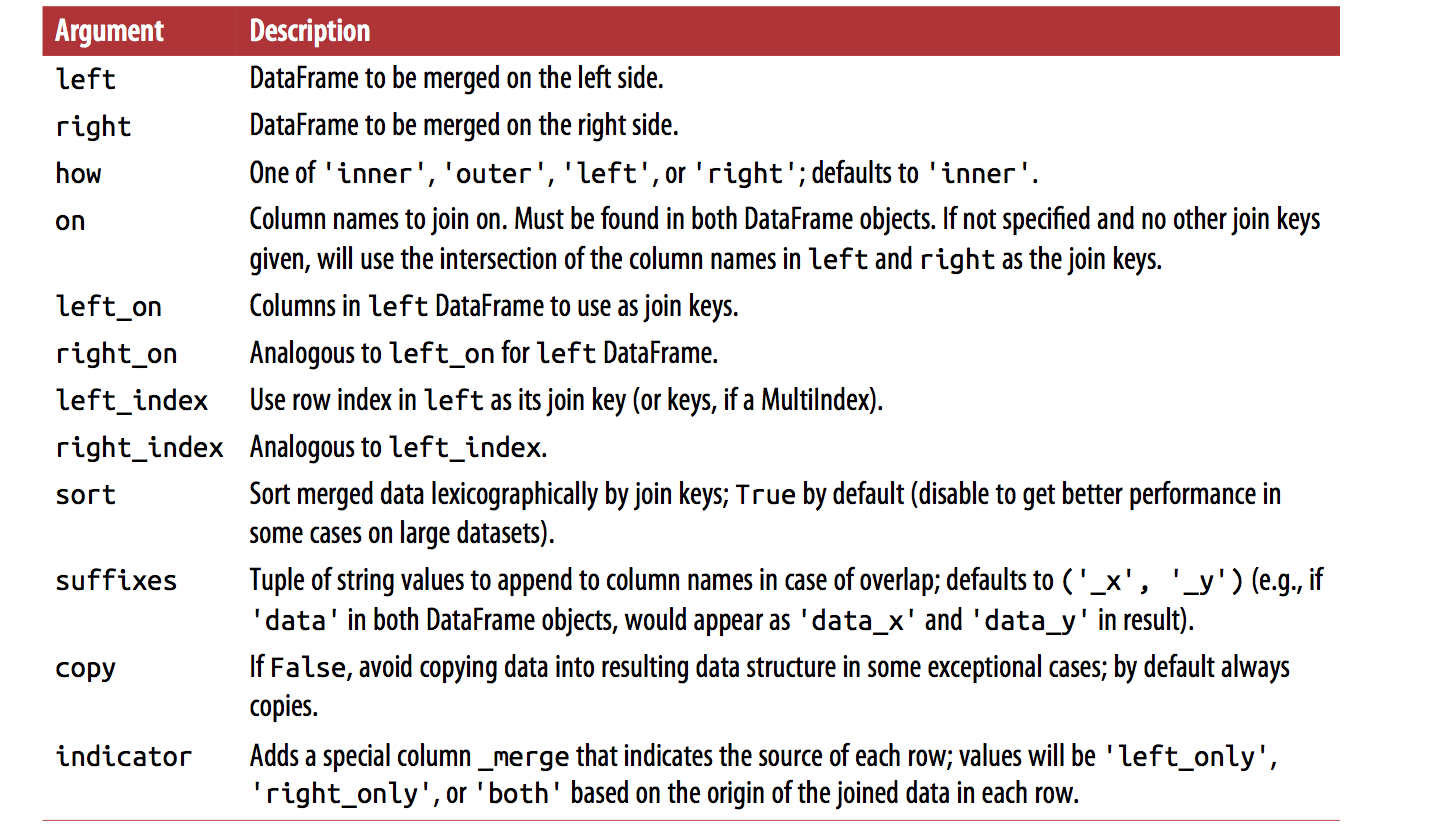

# Merging on Index

In some cases, the merge key(s) in a DataFrame will be found in its index. 
<br> In this case, you can pass left_index=True or right_index=True (or both) to indicate that the index should be used as the merge key:

In [14]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                        'value': range(6)})

In [15]:
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [16]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [17]:
right1

,group_val
a,3.5
b,7.0


In [18]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


Since the default merge method is to intersect the join keys, you can instead form the union of them with an outer join:

In [19]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


# Join Function

join function can be also used to merge many dataframes by index

In [23]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                             index=['a', 'c', 'e'],
                             columns=['Ohio', 'Nevada']) ;left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [24]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                          index=['b', 'c', 'd', 'e'],
                        columns=['Missouri', 'Alabama']);right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [25]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [26]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                     index=['a', 'c', 'e', 'f'],
                    columns=['New York', 'Oregon']);another


,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [27]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [28]:
left2.join([right2, another],how="outer")

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


## Concatenating Along an Axis

The concat function in pandas allows to add dataframes in rows or columns

In [29]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [31]:
s1

a    0
b    1
dtype: int64

In [32]:
s2

c    2
d    3
e    4
dtype: int64

In [33]:
s3

f    5
g    6
dtype: int64

In [34]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

By default concat works along axis=0, producing another Series. 
<br> If you pass axis=1, the result will instead be a DataFrame (axis=1 is the columns):

In [35]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


### Adding dataframes in rows 

In [38]:
import numpy as np
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd']);df1

,a,b,c,d
0,-0.904967,0.062239,0.396719,0.628327
1,-1.113057,-0.432178,0.439114,-0.123569
2,1.495106,1.327216,0.029674,0.268046


In [39]:
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a']);df2

,b,d,a
0,-0.132411,-1.242323,0.780361
1,0.669678,-0.011731,-1.102404


In [40]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.904967,0.062239,0.396719,0.628327
1,-1.113057,-0.432178,0.439114,-0.123569
2,1.495106,1.327216,0.029674,0.268046
3,0.780361,-0.132411,NaN,-1.242323
4,-1.102404,0.669678,NaN,-0.011731


In [41]:
pd.concat([df1, df2])

,a,b,c,d
0,-0.904967,0.062239,0.396719,0.628327
1,-1.113057,-0.432178,0.439114,-0.123569
2,1.495106,1.327216,0.029674,0.268046
0,0.780361,-0.132411,NaN,-1.242323
1,-1.102404,0.669678,NaN,-0.011731


# Time Series

## Date and Time Data Types

In [42]:
from datetime import datetime

In [43]:
now = datetime.now()

In [44]:
now

datetime.datetime(2018, 11, 25, 15, 11, 36, 508143)

In [45]:
now.year,now.day,now.month

(2018, 25, 11)

## Converting Between String and Datetime

In [46]:
stamp = datetime(2011, 1, 3)

In [47]:
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [49]:
#string formatting datetime objects
stamp.strftime('%Y-%m-%d')

'2011-01-03'

<img src="attachment:Screen%20Shot%202018-11-25%20at%2015.20.54.png" width="600" height="400" >
<img src="attachment:Screen%20Shot%202018-11-25%20at%2015.21.00.png" width="600" height="400" >
<img src="attachment:Screen%20Shot%202018-11-25%20at%2015.29.15.png" width="600" height="400" >



In [54]:
stamp.strftime('%B %b %A %a')

'January Jan Monday Mon'

## Changing the Locale 

In [57]:
import locale

In [58]:
locale.getdefaultlocale()

('en_US', 'UTF-8')

In [62]:
locale.setlocale(locale.LC_ALL,"tr_TR")

'tr_TR'

In [63]:
stamp.strftime('%B %b %A %a')

'Ocak Oca Pazartesi Pts'

## converting string to datetime objects in pandas

In [55]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [56]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

## Time Zone Handling

pd.date_range() function creates a time series index

In [64]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D')

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-17 09:30:00', '2012-03-18 09:30:00'],
              dtype='datetime64[ns]', freq='D')

with tz option you can set time zone 

In [66]:
ts=pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC');ts

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

you can convert time zones 

In [67]:
ts.tz_convert("Europe/Istanbul")

DatetimeIndex(['2012-03-09 11:30:00+02:00', '2012-03-10 11:30:00+02:00',
               '2012-03-11 11:30:00+02:00', '2012-03-12 11:30:00+02:00',
               '2012-03-13 11:30:00+02:00', '2012-03-14 11:30:00+02:00',
               '2012-03-15 11:30:00+02:00', '2012-03-16 11:30:00+02:00',
               '2012-03-17 11:30:00+02:00', '2012-03-18 11:30:00+02:00'],
              dtype='datetime64[ns, Europe/Istanbul]', freq='D')

## Resampling and Frequency Conversion

In [68]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [69]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [70]:
ts

2000-01-01   -0.672457
2000-01-02   -0.343688
2000-01-03   -0.705742
2000-01-04    0.506054
2000-01-05    0.192720
2000-01-06    0.474215
2000-01-07    2.273073
2000-01-08   -0.353809
2000-01-09   -0.730578
2000-01-10    1.924924
2000-01-11    0.674983
2000-01-12   -1.200016
2000-01-13    1.284643
2000-01-14   -0.436423
2000-01-15   -0.455241
2000-01-16    0.053316
2000-01-17   -0.298424
2000-01-18   -2.038246
2000-01-19    0.091379
2000-01-20    0.288538
2000-01-21   -0.086893
2000-01-22    0.992641
2000-01-23   -0.299169
2000-01-24   -0.609230
2000-01-25    0.607515
2000-01-26    1.416145
2000-01-27    0.950615
2000-01-28   -0.228622
2000-01-29   -0.150447
2000-01-30    0.719006
                ...   
2000-03-11    0.989965
2000-03-12    0.129349
2000-03-13    0.140748
2000-03-14   -0.373208
2000-03-15    1.009727
2000-03-16   -0.565623
2000-03-17    0.552512
2000-03-18    0.033139
2000-03-19    1.157293
2000-03-20   -0.604343
2000-03-21   -0.056381
2000-03-22    0.229382
2000-03-23 

### Getting monthly averages 

In [71]:
ts.resample('M').mean()

2000-01-31    0.134821
2000-02-29   -0.148567
2000-03-31   -0.219551
2000-04-30   -0.099152
Freq: M, dtype: float64

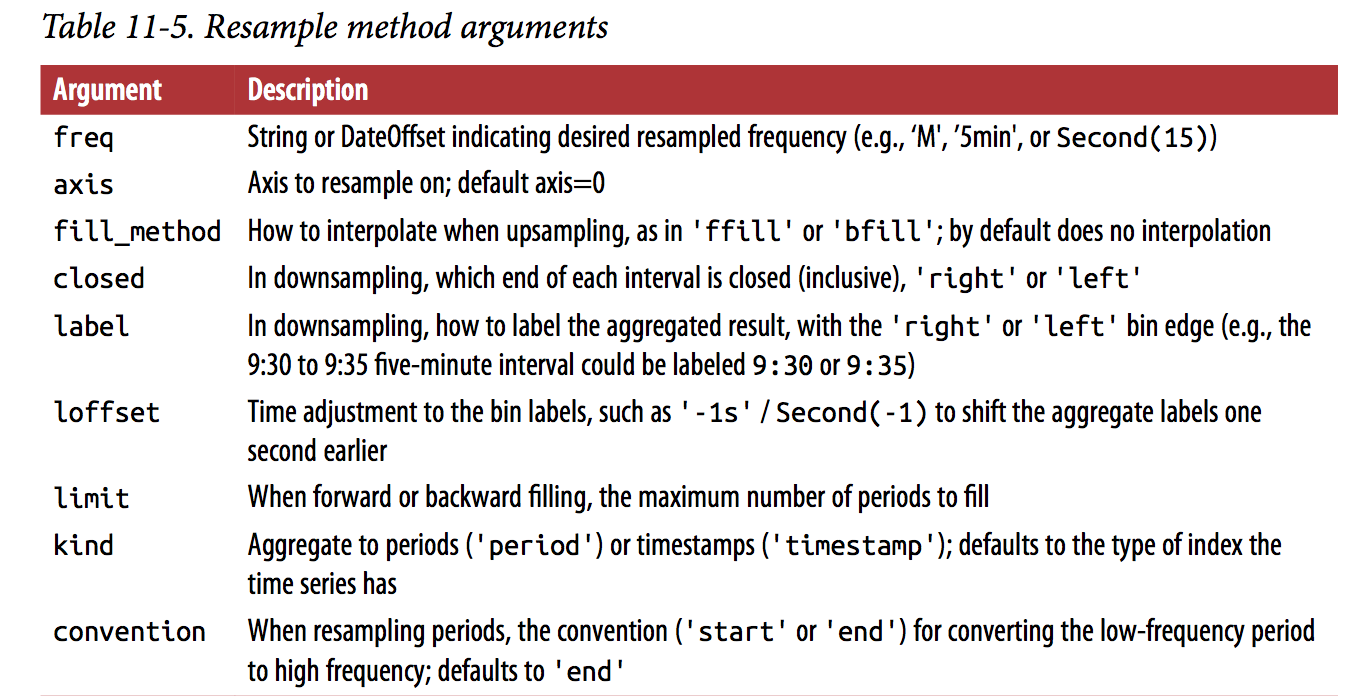

2000-01-31    0.134821
2000-02-29   -0.148567
2000-03-31   -0.219551
2000-04-30   -0.099152
Freq: M, dtype: float64

In [74]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)

In [75]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [76]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64